In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/filtered.tsv'
df = pd.read_csv(path, sep='\t', header=0)

In [ ]:
df.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


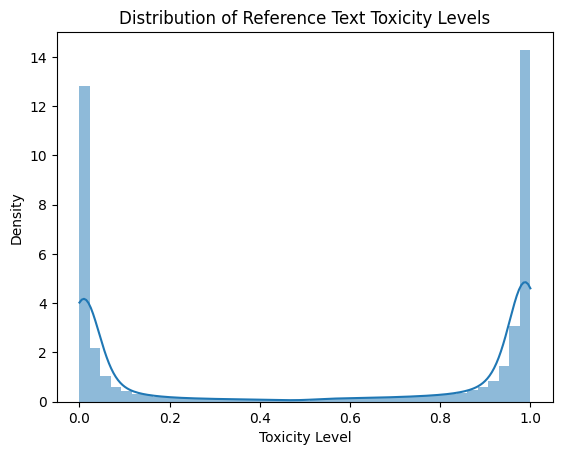

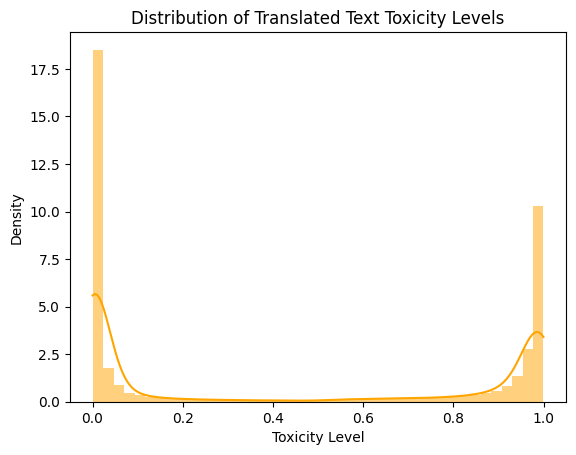

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of reference toxicity levels
sns.histplot(df['ref_tox'], kde=True, stat="density", linewidth=0)
plt.title('Distribution of Reference Text Toxicity Levels')
plt.xlabel('Toxicity Level')
plt.ylabel('Density')
plt.show()

# Distribution of translated toxicity levels
sns.histplot(df['trn_tox'], kde=True, stat="density", linewidth=0, color='orange')
plt.title('Distribution of Translated Text Toxicity Levels')
plt.xlabel('Toxicity Level')
plt.ylabel('Density')
plt.show()


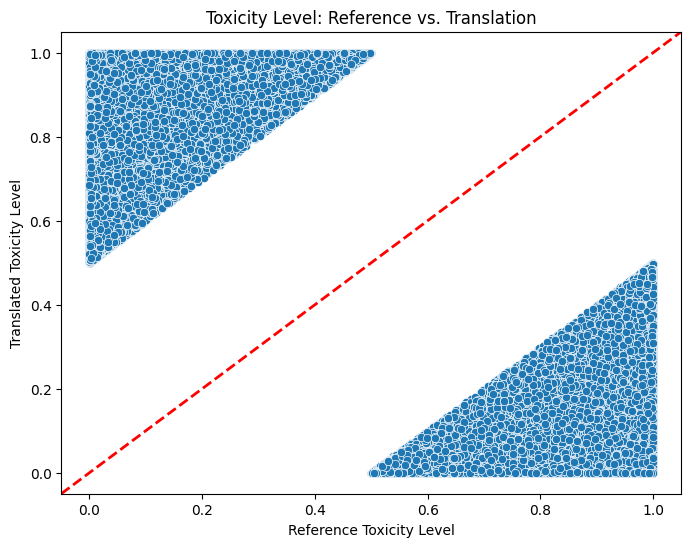

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ref_tox', y='trn_tox', data=df)
plt.title('Toxicity Level: Reference vs. Translation')
plt.xlabel('Reference Toxicity Level')
plt.ylabel('Translated Toxicity Level')
plt.axline((0, 0), (1, 1), linewidth=2, color='r', linestyle='--')  # y=x line
plt.show()


From this two graph above we can understand that the data in filtered.tsv confused. After translation trn_tox always has to be smaller than rfn_tox

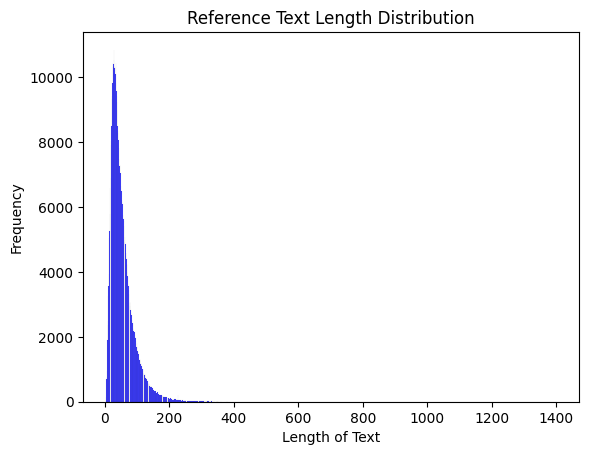

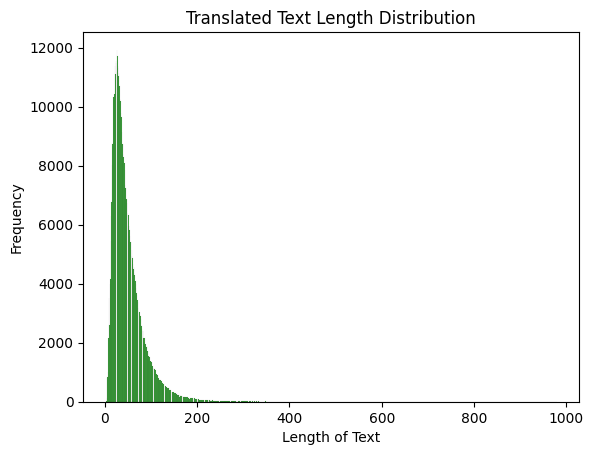

In [ ]:
df['ref_length'] = df['reference'].apply(len)
df['trn_length'] = df['translation'].apply(len)

sns.histplot(df['ref_length'], kde=False, color='blue')
plt.title('Reference Text Length Distribution')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['trn_length'], kde=False, color='green')
plt.title('Translated Text Length Distribution')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()


This graph is useful for model to bound input text to our model

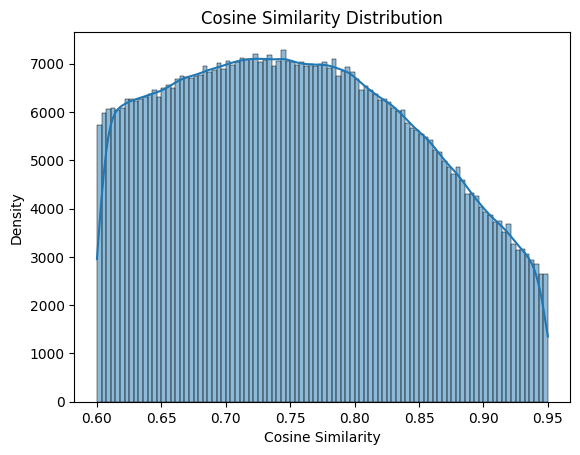

In [ ]:
sns.histplot(df['similarity'], kde=True)
plt.title('Cosine Similarity Distribution')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')
plt.show()


Seems like the similiarity range from 0.6 to 0.95 is applicable